# Touchstone files

This example shows how to use objects in a Touchstone file without opening AEDT.

To provide the advanced postprocessing features needed for this example, Matplotlib and NumPy
must be installed on your machine.

This example runs only on Windows using CPython.

Keywords: **Touchstone**, **report**.

## Prerequisites

### Perform imports

In [1]:
from ansys.aedt.core.examples.downloads import download_touchstone
from ansys.aedt.core.visualization.advanced.touchstone_parser import \
    read_touchstone

### Download example data

In [2]:
example_path = download_touchstone()

## Read the Touchstone file

In [3]:
data = read_touchstone(example_path)

## Demonstrate post-processing

### Plot serial channel metrics

Get the curve plot by category. The following code shows how to plot lists of the return losses,
insertion losses, next, and fext based on a few inputs and port names.

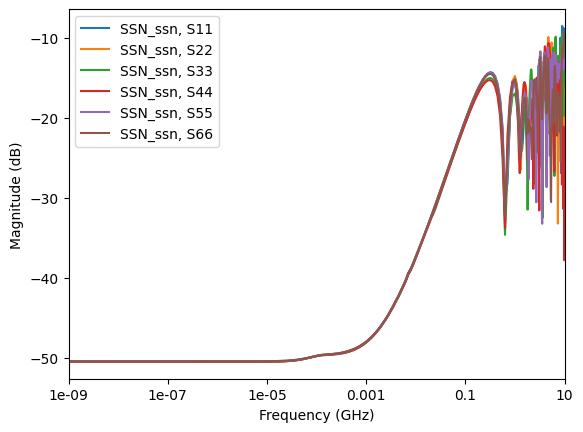

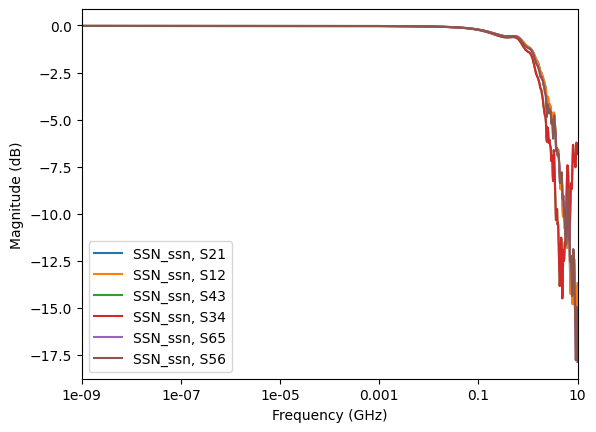

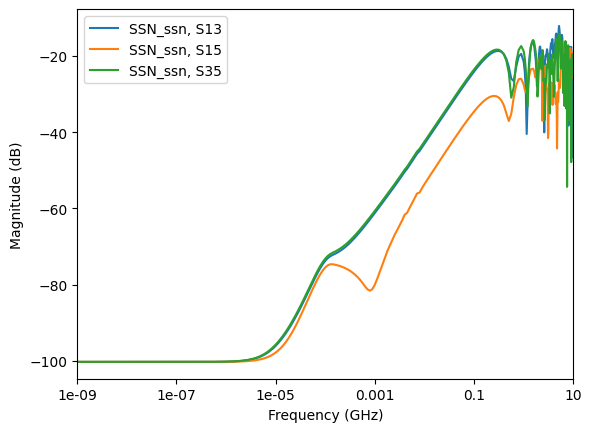

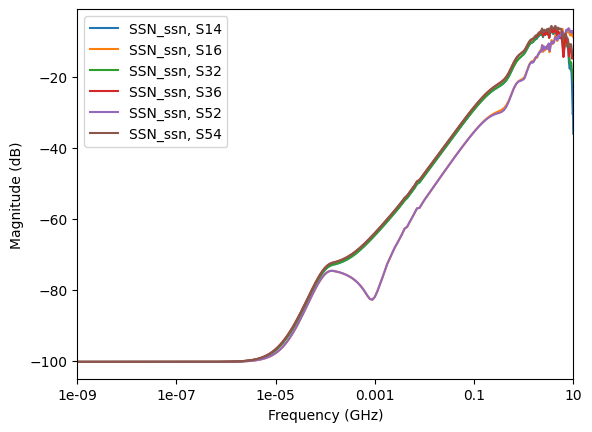

True

In [4]:
data.plot_return_losses()
data.plot_insertion_losses()
data.plot_next_xtalk_losses("U1")
data.plot_fext_xtalk_losses(tx_prefix="U1", rx_prefix="U7")

### Visualize cross-talk

Identify the worst case cross-talk.

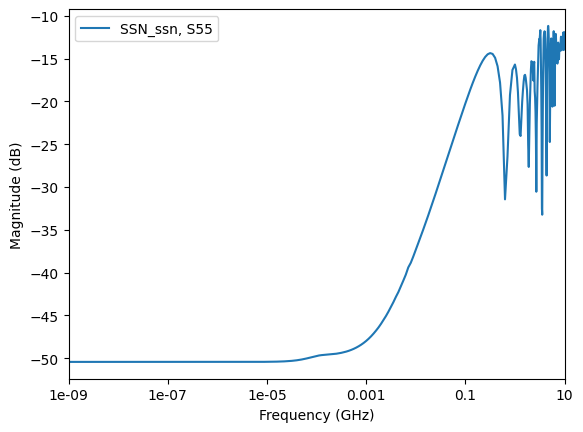

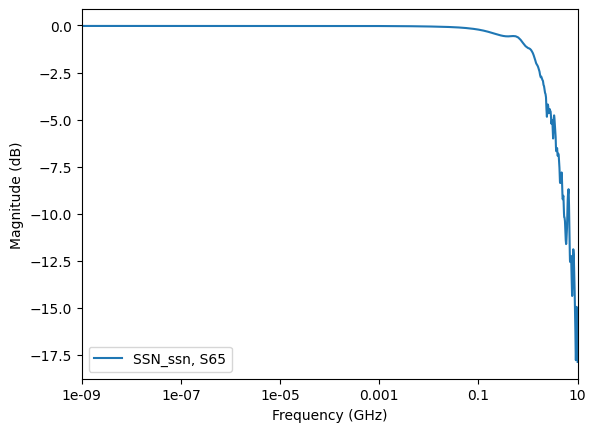

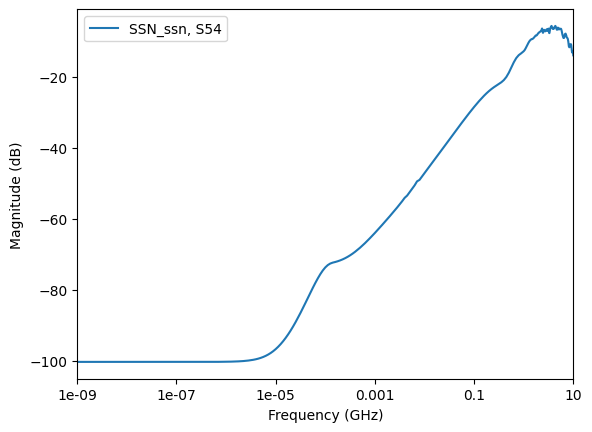

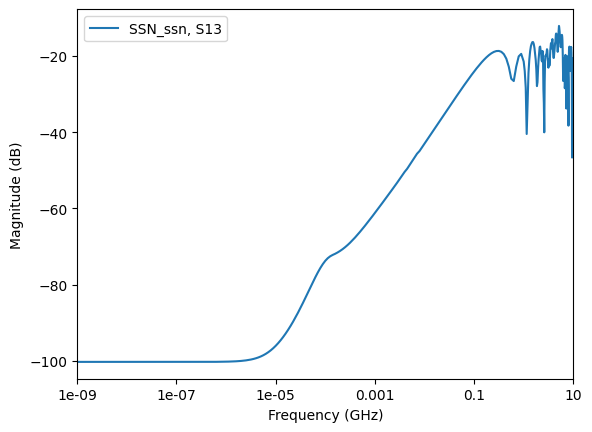

In [5]:
worst_rl, global_mean = data.get_worst_curve(
    freq_min=1,
    freq_max=20,
    worst_is_higher=True,
    curve_list=data.get_return_loss_index(),
)
worst_il, mean2 = data.get_worst_curve(
    freq_min=1,
    freq_max=20,
    worst_is_higher=False,
    curve_list=data.get_insertion_loss_index(),
)
worst_fext, mean3 = data.get_worst_curve(
    freq_min=1,
    freq_max=20,
    worst_is_higher=True,
    curve_list=data.get_fext_xtalk_index_from_prefix(tx_prefix="U1", rx_prefix="U7"),
)
worst_next, mean4 = data.get_worst_curve(
    freq_min=1,
    freq_max=20,
    worst_is_higher=True,
    curve_list=data.get_next_xtalk_index("U1"),
)